In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pathlib
import os
import sys
from pathlib import Path
from itertools import chain
import random

import numpy as np

import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image

import utils

In [3]:

data_dir = utils.download_file(url="https://uni-bielefeld.sciebo.de/s/AIJLvXMwP0ngEiW/download",
                               file_name="two4two_datasets.tar.gz",
                               cache_dir='../data', # change this if not using Colab
                               extract=True,
                               force_download=True,
                         archive_folder='two4two_datasets')
data_dir

File downloaded to: ../data/two4two_datasets.tar.gz
File extracted to: ../data


PosixPath('../data/two4two_datasets')

In [4]:
CLASSES = ['Healthy', 'OC Degen. Variant 2', 'OC Degen. Variant 1'] 
test_ds = 'sick_ones_bendbias_v23_harder_novariation'
eval_ds = 'sick_ones_bendbias_v23_harder_variation'

base_path = Path('/Users/djohnson/sciebo/1. Research/1. HCXAI/1. Projects/two4two_datasets')

test_df = pd.read_csv(base_path / 'test_preds.csv')
eval_df = pd.read_csv(base_path / 'eval_preds.csv')

test_dir = data_dir / test_ds / 'test'
eval_dir = data_dir / eval_ds / 'test'

# Data examples

In [5]:
# get all chars
chars = set(test_df.ill_chars.apply(lambda x: x.replace('[', '').replace("'", "").replace(']', '').replace(' ', '').
                            split(',')).sum())
chars.remove('')
print(chars)

{'med_sphere_diff', 'stretchy', 'high_bend', 'med_high_sphere_diff', 'med_bend', 'mutation_mainbones', 'mutation_color'}


In [6]:
bend_chars = [c for c in chars if 'bend' in c]
diff_chars = [c for c in chars if 'diff' in c]
color_chars = ['mutation_color']
bone_chars = ['mutation_mainbone']
head_chars = ['stretchy']

In [7]:
test_df.columns

Index(['obj_name', 'labeling_error', 'spherical', 'ill', 'ill_chars',
       'ill_spherical', 'num_diff', 'bending', 'obj_rotation_roll',
       'obj_rotation_pitch', 'obj_rotation_yaw', 'fliplr', 'position_x',
       'position_y', 'arm_position', 'obj_color', 'obj_color_rgba', 'bg_color',
       'bg_color_rgba', 'resolution', 'id', 'original_id',
       '_attributes_status', 'label', '__module__', '__name__', 'filename',
       'sphere_diff', 'pred'],
      dtype='object')

In [8]:
def display_char(chars, char_name, random_state=42):
  selected_exs = [False] * len(test_df)
  dfs = []
  for c in chars:
    exs = test_df.ill_chars.apply(lambda x: c in x)
    selected_exs = selected_exs | exs
    df = utils.display_images(test_df[exs], 1, 4, test_dir, f'Examples with {c}', random_state=random_state)
    display(df[['ill_chars', char_name]])
    plt.show()
    dfs.append(df)

  df = utils.display_images(test_df[~selected_exs], 1, 4, test_dir, f'Examples with No Char', random_state=random_state)
  dfs.append(df)
  display(df[['ill_chars', char_name]])
  plt.show()

## Posture

/var/folders/cn/w2dpgz0941bcbfg3wgqzyr6c0000gn/T/ipykernel_13903/3822091431.py:6: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  selected_exs = selected_exs | exs


,ill_chars,bending
1635,"['med_sphere_diff', 'mutation_mainbones', 'med...",0.164431
927,"['med_bend', 'high_bend']",0.311922
1334,"['med_sphere_diff', 'med_bend']",0.168880
1925,"['med_bend', 'mutation_color']",0.248866


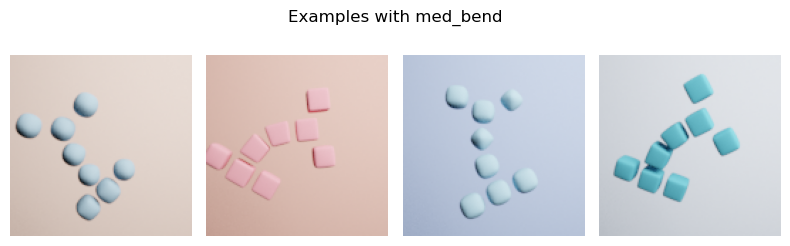

,ill_chars,bending
2212,"['high_bend', 'med_sphere_diff', 'mutation_mai...",0.272148
2150,"['high_bend', 'med_sphere_diff', 'mutation_col...",0.303593
1235,"['high_bend', 'med_high_sphere_diff']",0.281255
1091,"['med_sphere_diff', 'high_bend', 'mutation_col...",0.336970


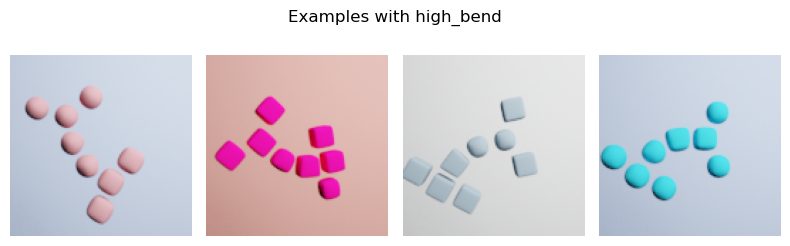

,ill_chars,bending
75,"['med_sphere_diff', 'mutation_color']",0.080641
2553,"['mutation_mainbones', 'med_high_sphere_diff']",0.068517
2334,"['mutation_color', 'mutation_color']",0.090174
736,"['med_sphere_diff', 'mutation_color']",0.122564


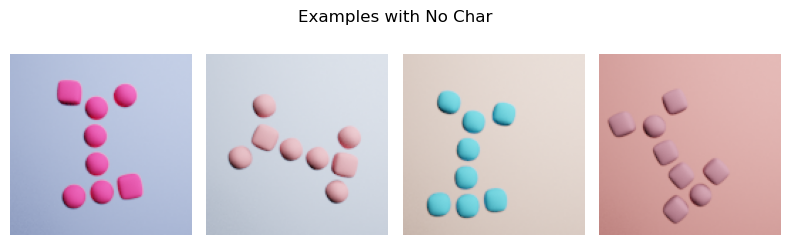

In [17]:
dfs = display_char(bend_chars, 'bending', random_state=10)

## Bone Variation

/var/folders/cn/w2dpgz0941bcbfg3wgqzyr6c0000gn/T/ipykernel_13903/3822091431.py:6: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  selected_exs = selected_exs | exs


,ill_chars,sphere_diff
1923,"['med_bend', 'med_sphere_diff']",0.376063
981,"['high_bend', 'med_sphere_diff', 'mutation_col...",0.549041
2977,"['med_sphere_diff', 'mutation_color', 'mutatio...",0.438846
1584,['med_sphere_diff'],0.521920


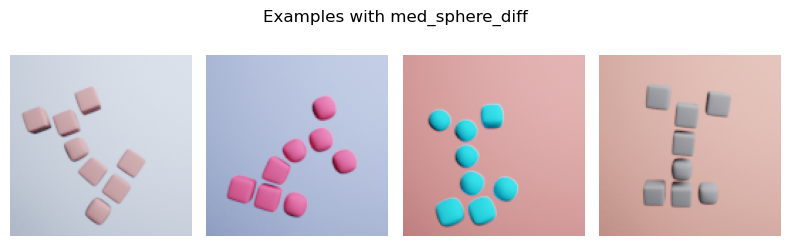

,ill_chars,sphere_diff
1772,"['med_high_sphere_diff', 'stretchy', 'mutation...",0.650312
309,"['med_high_sphere_diff', 'med_bend', 'mutation...",0.715655
1951,['med_high_sphere_diff'],0.758548
2603,"['high_bend', 'med_high_sphere_diff']",0.545708


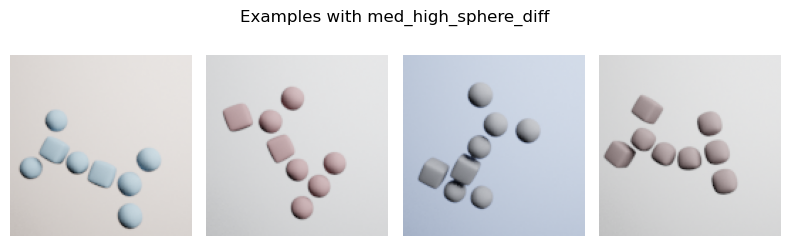

,ill_chars,sphere_diff
2564,"['med_bend', 'stretchy', 'mutation_mainbones']",0.168403
696,"['mutation_color', 'mutation_color']",0.253195
158,['high_bend'],0.220162
1066,[],0.304288


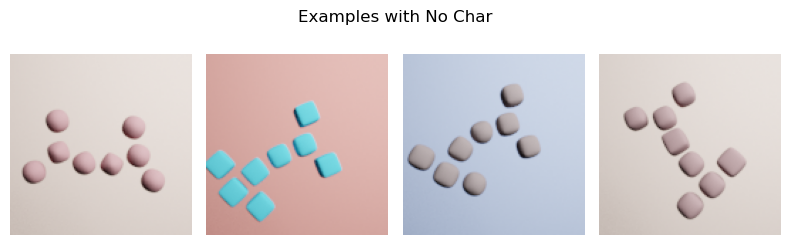

In [18]:
display_char(diff_chars, 'sphere_diff', random_state=10)

/var/folders/cn/w2dpgz0941bcbfg3wgqzyr6c0000gn/T/ipykernel_13903/3822091431.py:6: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  selected_exs = selected_exs | exs


,ill_chars,obj_color
282,"['mutation_color', 'mutation_color']",0.873298
426,"['high_bend', 'mutation_color']",0.315904
934,"['med_sphere_diff', 'mutation_color']",0.093539
597,"['med_sphere_diff', 'mutation_color']",0.489731


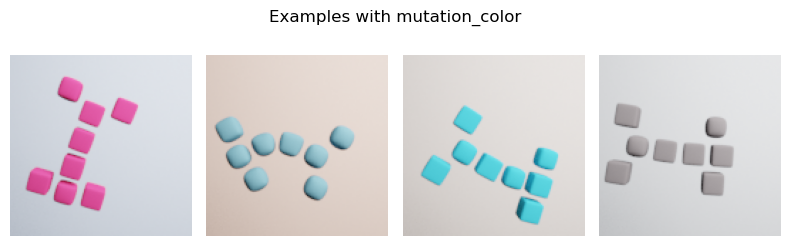

,ill_chars,obj_color
1860,"['med_sphere_diff', 'high_bend']",0.852647
2887,"['med_sphere_diff', 'stretchy']",0.539029
434,"['high_bend', 'mutation_mainbones', 'med_high_...",0.126058
2102,"['high_bend', 'med_high_sphere_diff']",0.251978


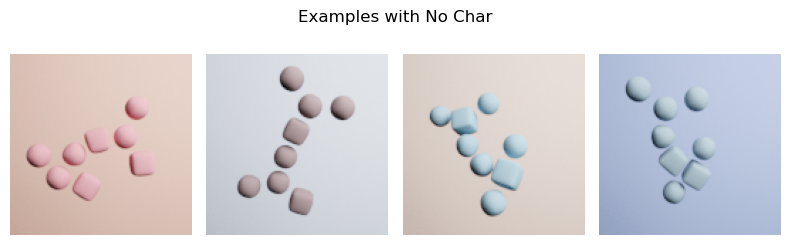

In [25]:
display_char(color_chars, 'obj_color', random_state=10)

/var/folders/cn/w2dpgz0941bcbfg3wgqzyr6c0000gn/T/ipykernel_13903/3822091431.py:6: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  selected_exs = selected_exs | exs


,ill_chars,spherical
2604,"['stretchy', 'med_high_sphere_diff', 'mutation...",1.097362
2262,"['high_bend', 'med_sphere_diff', 'mutation_col...",1.124457
2015,"['mutation_mainbones', 'high_bend', 'stretchy']",1.165256
1749,"['med_sphere_diff', 'mutation_mainbones', 'med...",1.093296


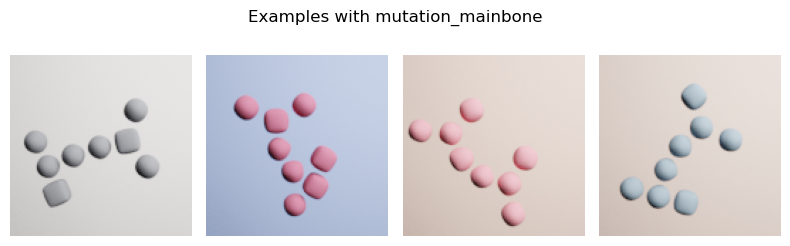

,ill_chars,spherical
70,"['med_bend', 'med_high_sphere_diff']",0.998717
2246,"['mutation_color', 'high_bend']",0.516062
2211,"['med_high_sphere_diff', 'med_bend', 'mutation...",0.401981
900,"['med_bend', 'high_bend']",0.997453


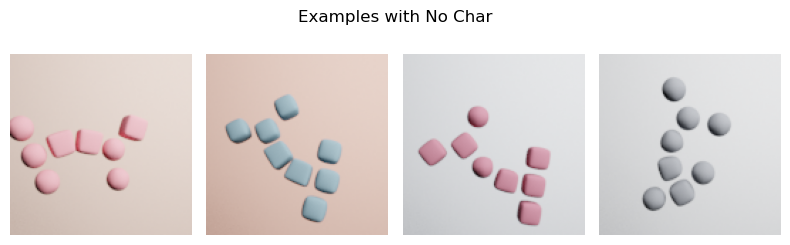

In [26]:
display_char(bone_chars, 'spherical', random_state=10)

/var/folders/cn/w2dpgz0941bcbfg3wgqzyr6c0000gn/T/ipykernel_13903/3822091431.py:6: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  selected_exs = selected_exs | exs


,ill_chars,arm_position
721,"['med_bend', 'stretchy', 'med_high_sphere_diff...",0.481920
2202,"['med_sphere_diff', 'high_bend', 'stretchy']",0.764999
886,"['high_bend', 'med_sphere_diff', 'stretchy']",0.703572
1515,"['stretchy', 'med_sphere_diff']",0.577583


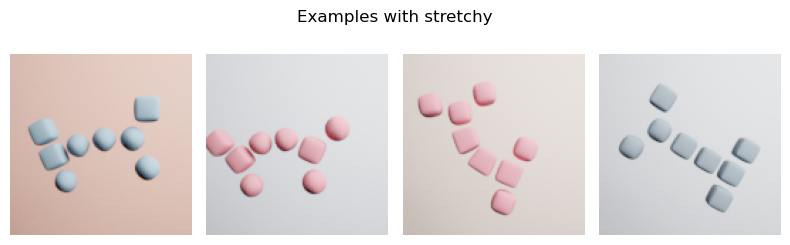

,ill_chars,arm_position
1145,"['mutation_color', 'med_sphere_diff']",0.518385
1895,"['mutation_color', 'mutation_color']",0.248131
2768,"['med_bend', 'mutation_color']",0.403792
261,"['mutation_color', 'med_high_sphere_diff']",0.478107


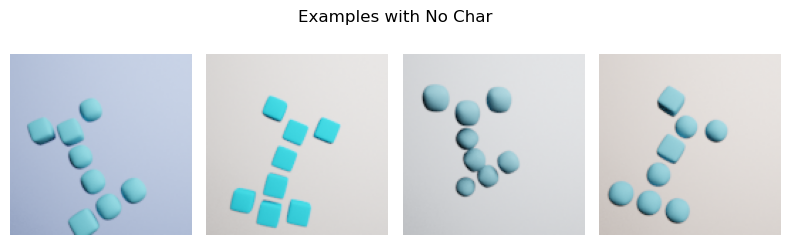

In [23]:
display_char(head_chars, 'arm_position', random_state=10)